## Mentoria de  Detección de Fraude de Tarjeta de Crédito  : Análisis y Curación de datos.



#### Índice de contenido
* [Introducción](#introduccion)

* [Presentación: Equipo de trabajo](#presentacion)

* [Librerías Externas](#Libs)

* [1- Carga de datos y exploración de la correlación ](#carga)

* [2- Generación de nuevas features ](#generacion)

* [3- Escalado de features](#escalado)

### Introducción  <a class="anchor" id="introduccion"></a>

Como vimos en el práctico 1, nuestro dataset posee varias particularidades en torno a la forma y presentación de los datos. La mayor parte de las features son el resultado de aplicar PCA sobre el conjunto original, y esto hace que nos encontremos con un conjunto de varaibles relativamente "limpio".  
El "problema" con nuestro dataset desde el punto de vista de la curación de datos es, entonces, que ya está bien curado y procesado.  
Siendo este el contexto, el práctico apunta entonces a seguir preparando el dataset para el entrenamiento, atendiendo a estas características. Los objetivos van a ser los siguentes:
- Armar una matriz de correlación para visualizar de manera más clara la información de las features.
- Obtener nuevas features a partir de la variable **time**
- Reescalar las variables que sean necesarias y desechar aquellas que no sean óptimas para el entrenamiento.

### Presentación : Equipo de trabajo <a class="anchor" id="presentacion"></a>


Integrantes:

* Baulina,David

* Carabajal,Javier

* Folonier,Hugo

* Tula,Melani

### Librerías Externas      <a class="anchor" id="Libs"></a>

In [28]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import numpy as np


### 1- Carga de datos y exploración de la correlación entre datos.      <a class="anchor" id="carga"></a>

Por lo visto en los prácticos de análisis y curación sabemos que PCA implica una reducción de dimensionalidad de la matriz original. Pero eso no quita que podamos analizar el dataset y visualizar las relaciones que hay enter las variables y el target. Exploremos un poco más dichas relaciones.  
  1. Genere un gráfico que muestre una matriz de correlación entre las features.
  2. Muestre a través de un  pairplot la distribución de cada variable por separado utilizando histogramas procurando visualizar la distribución de ambas clases. A simplee vista, ¿cuáles variables parece "separar" mejor las dos clases? 

In [2]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/p-eleuterio/card-fraud-detection-2022/main/dataset/fraud_data_pt1.csv', index_col=0)
df_2 = pd.read_csv('https://raw.githubusercontent.com/p-eleuterio/card-fraud-detection-2022/main/dataset/fraud_data_pt2.csv', index_col=0)
df_unidos=pd.concat([df_1,df_2], ignore_index=True)
df_unidos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
total_count = len(df_unidos)
fraud_count = len(df_unidos[df_unidos.Class == 1])
print("El procentaje de fraude del dataframe es: %", (fraud_count/total_count)*100)

El procentaje de fraude del dataframe es: % 0.1727485630620034


Retocaremos un poco el dataframe para que el porcentaje de fraudes sea mayor y entonces sea mas facil entrenar los modelos. Lo subiremos a una centesima parte de los valores del dataframe

In [4]:
df_reducido = pd.concat([df_unidos[df_unidos.Class == 0].sample(fraud_count*9), df_unidos[df_unidos.Class == 1]], ignore_index=False)
len(df_reducido)

4920

<AxesSubplot:>

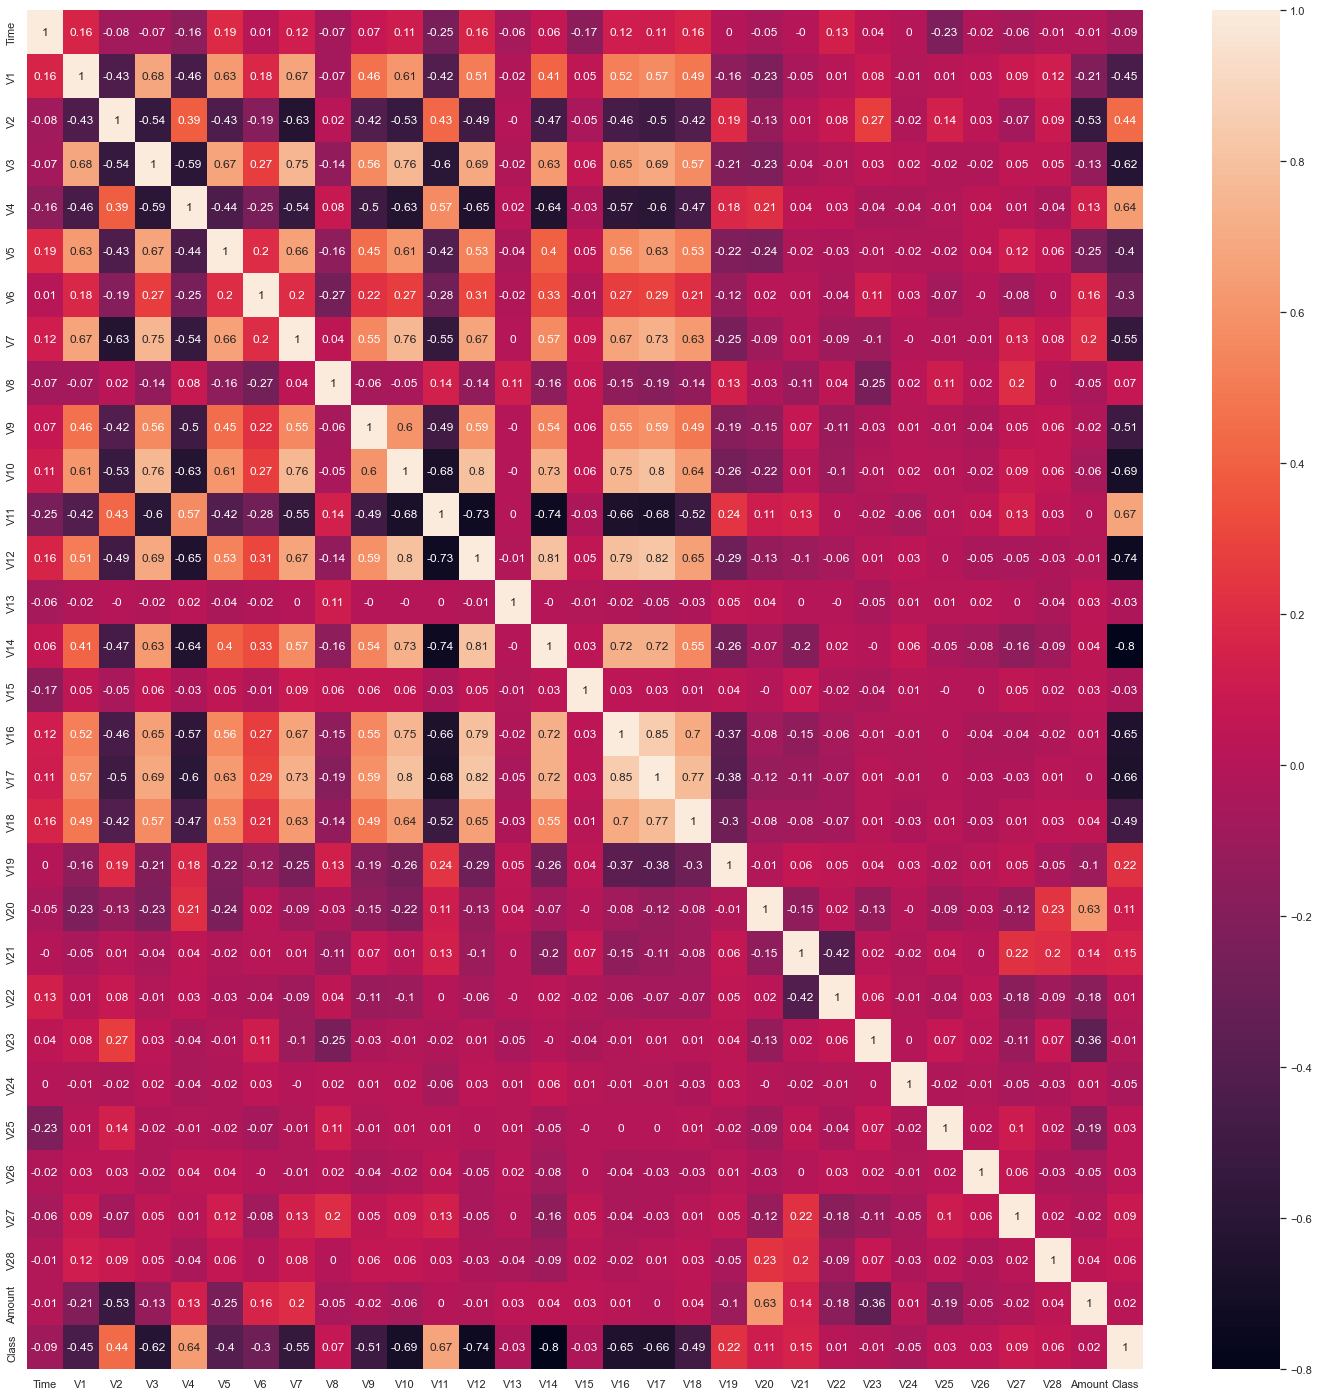

In [5]:
sns.set(rc = {'figure.figsize':(25,25)})
correlation_matrix=df_reducido.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [6]:
not_v_variables = ["Amount", "Class", "Time"]
v_variables = sorted(set(df_reducido.columns).difference(not_v_variables))

C:\Users\Usuario\Desktop\Roco\env\lib\site-packages\seaborn\axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


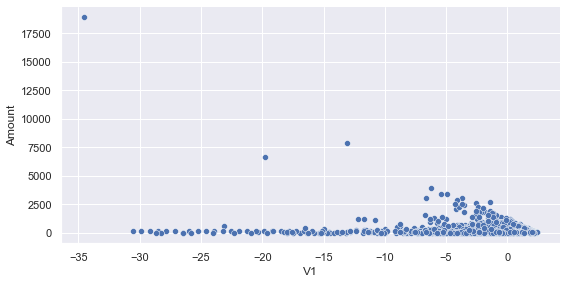

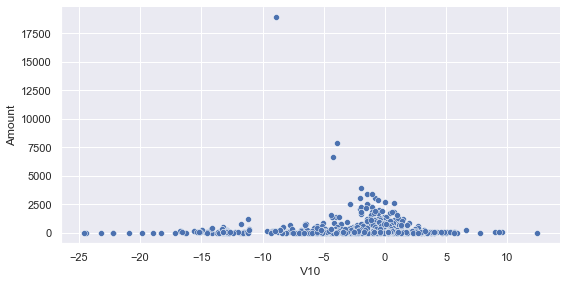

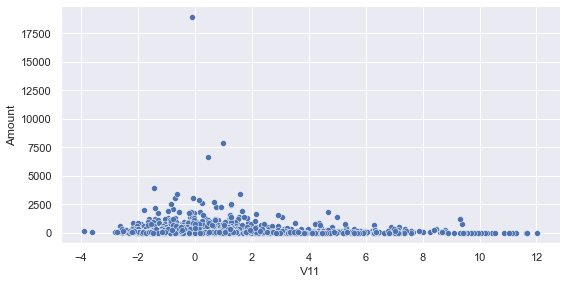

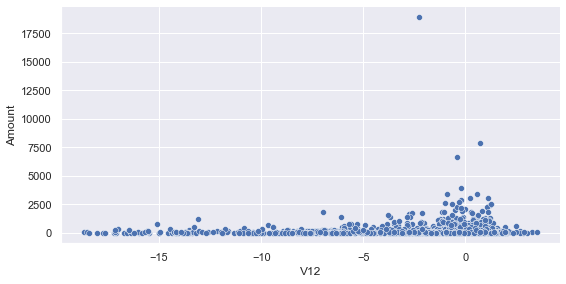

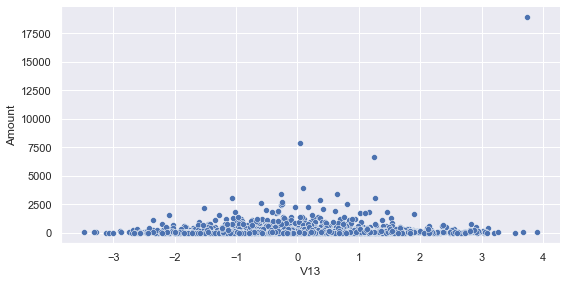

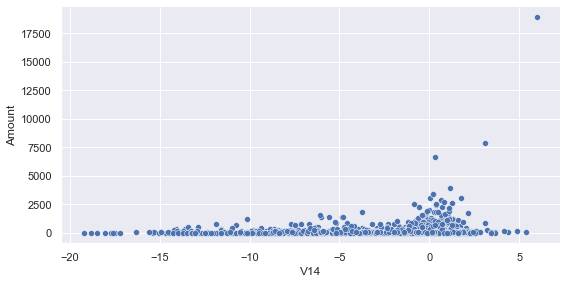

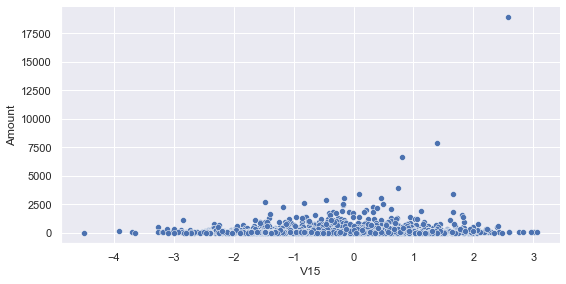

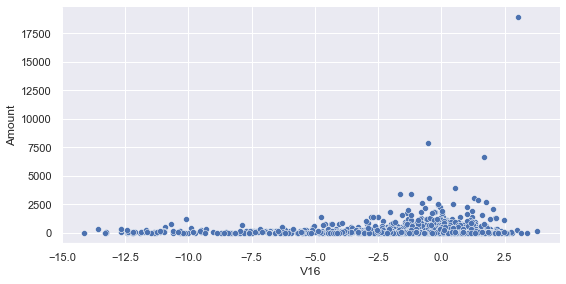

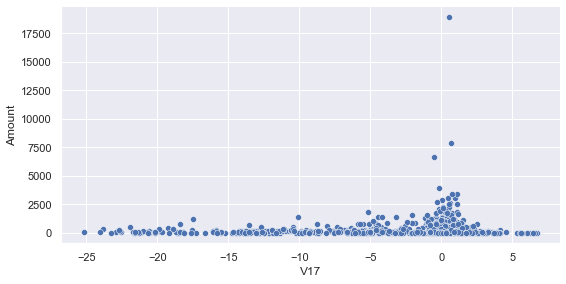

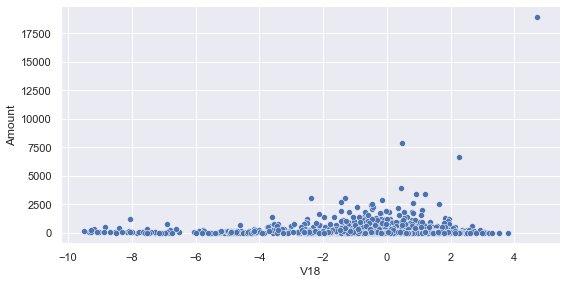

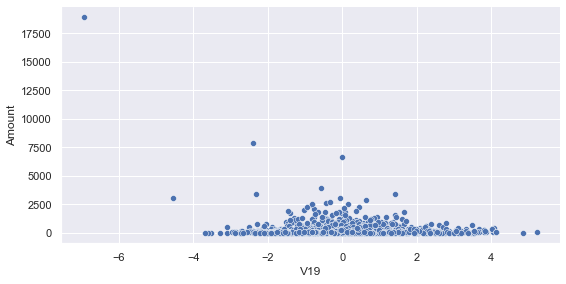

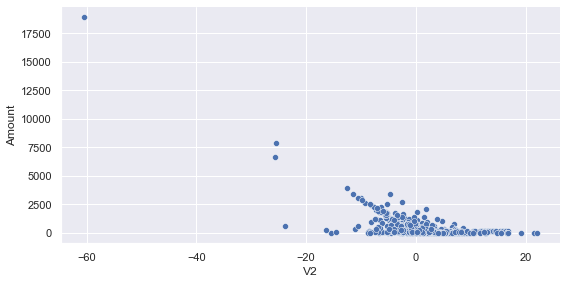

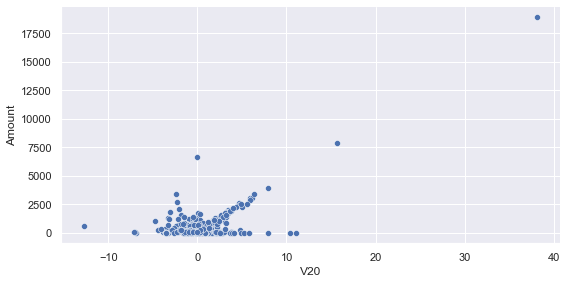

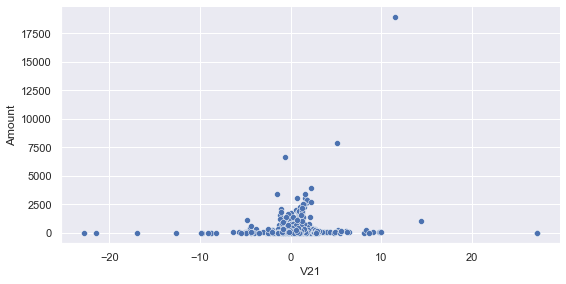

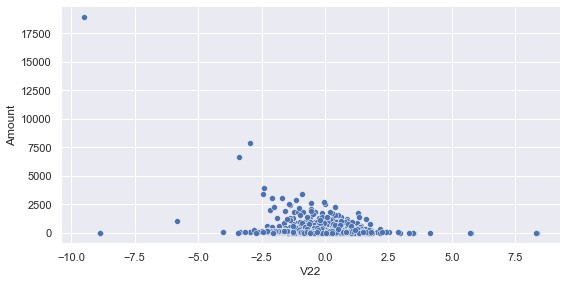

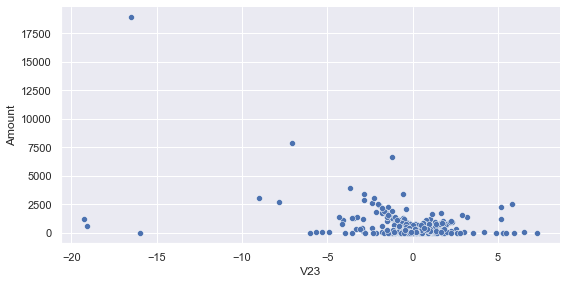

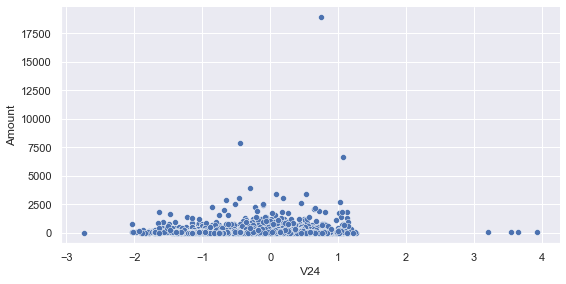

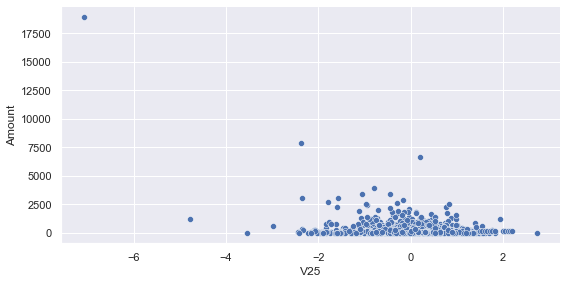

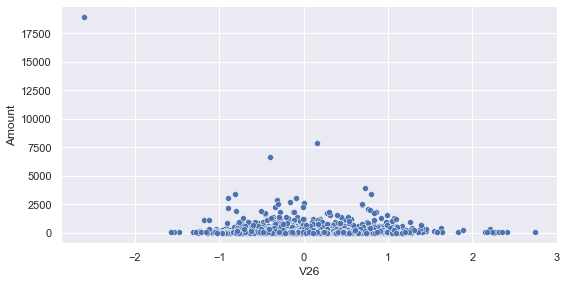

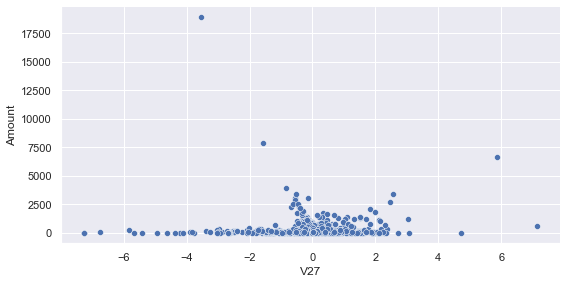

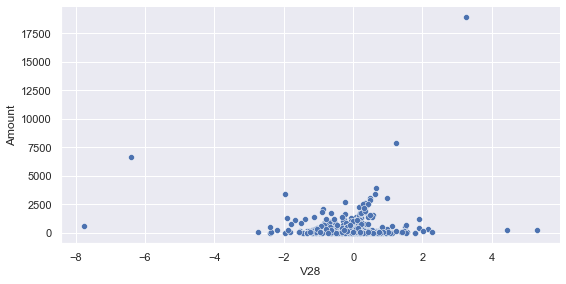

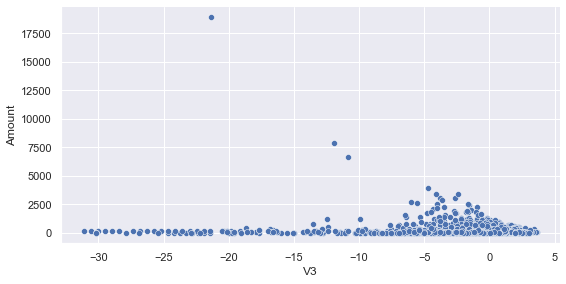

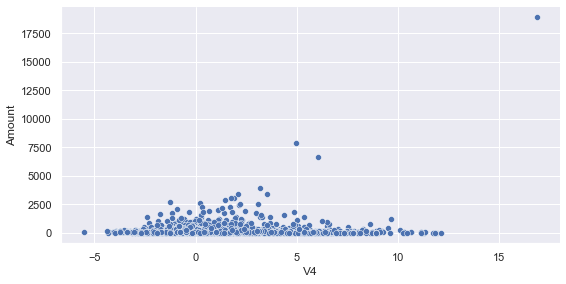

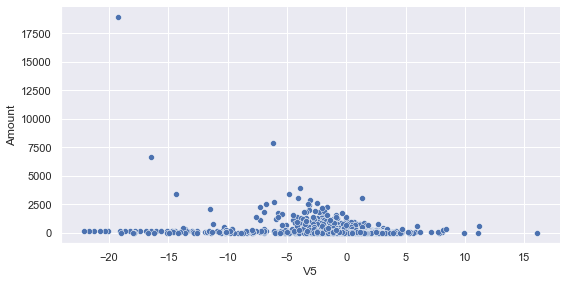

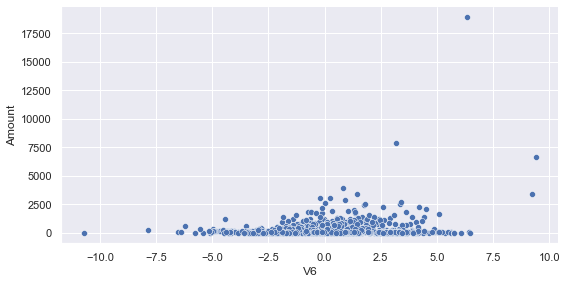

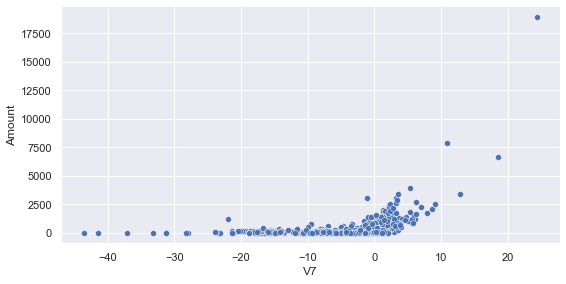

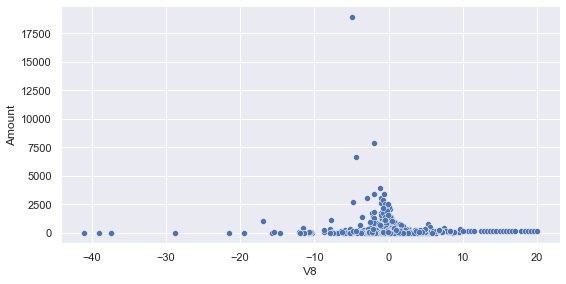

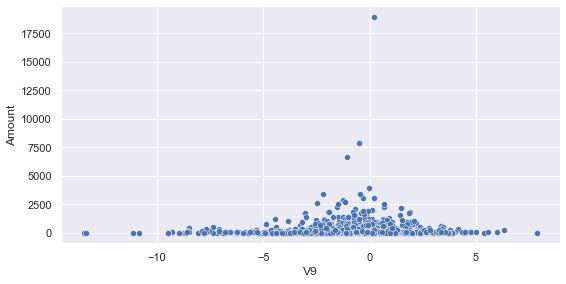

In [7]:
for var in v_variables:
  sns.pairplot(data=df_reducido, y_vars=["Amount"],
    x_vars=[var],
    aspect=2, height=4)

De todas las variables, las que parecen tener mayór correlacion con Class son, de mayor a menor, la V11, la V4 y la V2.

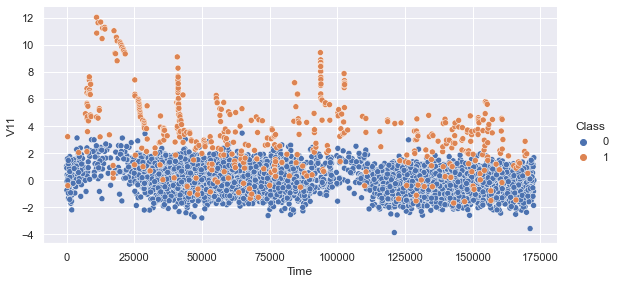

In [8]:
sns.pairplot(data=df_reducido, y_vars=["V11"],
  x_vars=["Time"],
  hue="Class",
  aspect=2, height=4)

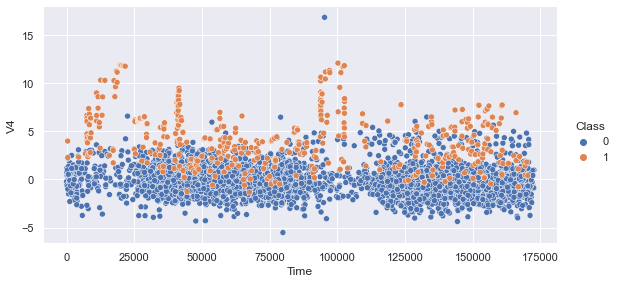

In [9]:
sns.pairplot(data=df_reducido, y_vars=["V4"],
  x_vars=["Time"],
  hue="Class",
  aspect=2, height=4)

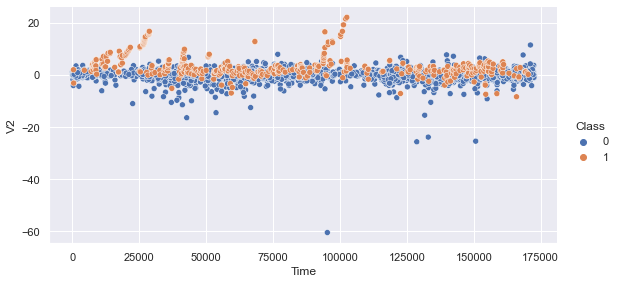

In [10]:
sns.pairplot(data=df_reducido, y_vars=["V2"],
  x_vars=["Time"],
  hue="Class",
  aspect=2, height=4)

### 2. Generación de nuevas features. <a class="anchor" id="generacion"></a>

Ahora bien, esta es nuestra oportunidad de generar nuevas features y explorar las relacionees de las mismas con el target. Usando la variable **time** el objetivo es crear una nueva feature quee aporte información sobre posibles correlaciones latentes en la misma.  
  1. Usando métodos a elección, generen una nueva variable que cuente la cantidad de eventos fraudulentos een la última hora a partir del pago. (Esto es, si en la última hora a partir del momento del pago ocurrieron 3 pagos fraudulentos, el valor de la variable para este pago debería ser 3).
  2. Realice un gráfico de pairplot de esta variable como en el punto 1 con relación al target. ¿Observan alguna correlación?
  3. Analicen la correlación de esta variable con el target con un método a elección. ¿Les parece que la variable puede ser de valor?

In [11]:
def acc_hour_1(df):
    df_time = df.Time.to_numpy()
    df_filtered = df[['Time', 'Class']]
    response = [] 
    for t in df_time:
        df_t = df_filtered[(df_filtered.Time > (t -3600)) & (df_filtered.Time <= t)]
        if df_t.Class.value_counts()[0] == df_t.shape[0]:
            response.append(0)
        else:
            response.append(df_t.Class.value_counts()[1])
    return response

In [12]:
df_reducido["last_hour_fraud"] = acc_hour_1(df_reducido)
df_reducido.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,last_hour_fraud
186510,127140.0,0.044624,0.908268,0.309747,-0.588580,0.453493,-1.118614,1.048571,-0.239719,-0.129354,...,-0.523939,0.062958,0.054760,-0.471733,0.135880,0.251003,0.098677,2.67,0,4
126601,78038.0,-1.327929,0.241404,2.140717,-0.663216,-0.999020,-0.971438,-0.466068,0.331047,1.323022,...,0.280140,-0.422643,0.731312,0.204741,-0.546678,0.064330,-0.268729,1.00,0,16
44590,42010.0,1.101072,0.099279,0.507688,1.495400,-0.394915,-0.384315,0.055510,-0.002878,0.373768,...,-0.064223,-0.031957,0.389901,0.587655,-0.332264,0.031848,0.021303,29.09,0,38
150009,92366.0,-0.766226,1.020297,1.170658,-0.643297,1.369088,-0.376138,1.078773,-0.236309,0.706933,...,-0.911193,-0.310041,0.417197,0.771380,-0.514348,-0.017040,0.056992,9.99,0,8
194770,130749.0,2.048188,-0.150777,-1.218413,0.213809,0.052801,-0.680115,0.032485,-0.129424,0.397334,...,-0.705925,0.287381,-0.422631,-0.295917,0.204720,-0.078719,-0.075485,0.89,0,13


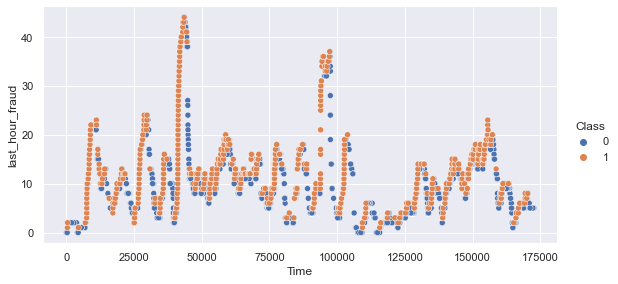

In [13]:
sns.pairplot(data=df_reducido, y_vars=["last_hour_fraud"],
  x_vars=["Time"],
  hue="Class",
  aspect=2, height=4)

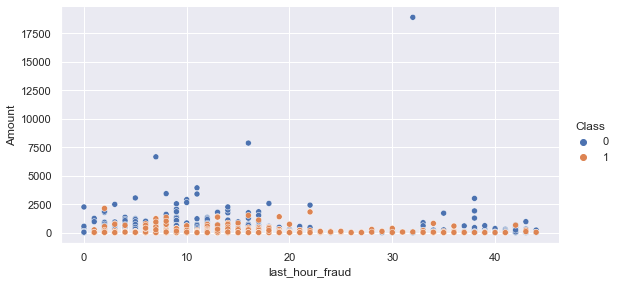

In [14]:
sns.pairplot(data=df_reducido, y_vars=["Amount"],
  x_vars=["last_hour_fraud"],
  hue="Class",
  aspect=2, height=4)

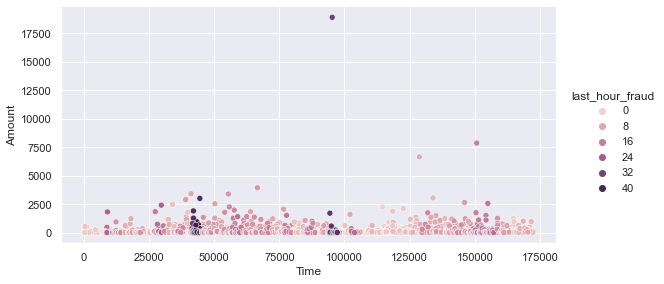

In [15]:
sns.pairplot(data=df_reducido, y_vars=["Amount"],
  x_vars=["Time"],
  hue="last_hour_fraud",
  aspect=2, height=4)

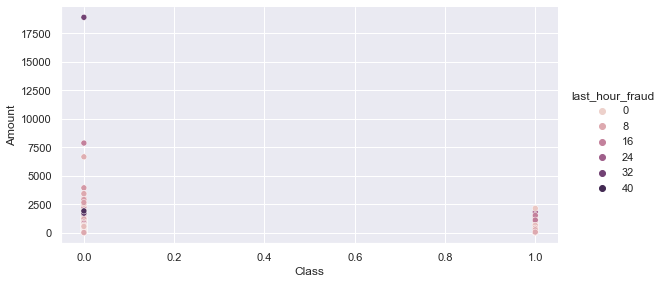

In [16]:
sns.pairplot(data=df_reducido, y_vars=["Amount"],
  x_vars=["Class"],
  hue="last_hour_fraud",
  aspect=2, height=4)

2.3) Por lo que vemos en los gráficos hay una fuerte correlación entre el acumulado por clase (aqui llamado "last_hour_fraud") y el target, la variable "Class"

### 3- Escalado de features.      <a class="anchor" id="escalado"></a>

Finalmente, para preparar nuestro dataset para el entrenamiento debemos considerar si la escala en la que se encuentran nuestras features es la óptima para trabajar copn distintos modelos o si tal vez sería deseable manejar valores en nuestras features que no sean problemáticos en ciertos escenarios de entrenamiento.
  1. La variable **amount** puede presentar una diferencia muy grande con las otras variables del conjunto con respecto al rango de distribución de los valores. Utilice alguna función de su elección para escalar esta variable atendiendo los rangos de valores de las otras feaures (1, -1)
  2. A la hora de entrenar, ¿es conveniente conservar la variable **time**? Analice este punto, de sus perspectivas al respecto y si decicen eliminarla, escriban la función con la cual lo harían.

In [17]:
df_reducido[:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,last_hour_fraud
186510,127140.0,0.044624,0.908268,0.309747,-0.588580,0.453493,-1.118614,1.048571,-0.239719,-0.129354,...,-0.523939,0.062958,0.054760,-0.471733,0.135880,0.251003,0.098677,2.67,0,4
126601,78038.0,-1.327929,0.241404,2.140717,-0.663216,-0.999020,-0.971438,-0.466068,0.331047,1.323022,...,0.280140,-0.422643,0.731312,0.204741,-0.546678,0.064330,-0.268729,1.00,0,16
44590,42010.0,1.101072,0.099279,0.507688,1.495400,-0.394915,-0.384315,0.055510,-0.002878,0.373768,...,-0.064223,-0.031957,0.389901,0.587655,-0.332264,0.031848,0.021303,29.09,0,38
150009,92366.0,-0.766226,1.020297,1.170658,-0.643297,1.369088,-0.376138,1.078773,-0.236309,0.706933,...,-0.911193,-0.310041,0.417197,0.771380,-0.514348,-0.017040,0.056992,9.99,0,8
194770,130749.0,2.048188,-0.150777,-1.218413,0.213809,0.052801,-0.680115,0.032485,-0.129424,0.397334,...,-0.705925,0.287381,-0.422631,-0.295917,0.204720,-0.078719,-0.075485,0.89,0,13
160848,113696.0,0.071579,0.783914,-0.241810,-1.018202,1.229805,-0.033983,0.885339,-0.002869,-0.297579,...,-0.663762,-0.115345,-1.376272,-0.315269,0.203707,0.244640,0.075379,1.29,0,3
48595,43706.0,-0.558141,-0.305141,0.891752,-2.332251,-1.421118,-1.017823,-0.726478,0.473278,-2.419536,...,0.031325,0.122751,0.480387,-0.263240,-0.434462,0.170469,0.003431,30.00,0,43
23520,32800.0,1.098112,-0.299107,0.562483,0.819183,-0.872858,-0.681937,-0.146515,-0.023914,0.786041,...,-0.874937,0.043439,0.379359,0.234518,0.284414,-0.046614,0.023584,72.98,0,7
168512,119263.0,1.929860,-1.265139,-0.278205,-0.298693,-1.460140,-0.336919,-1.092912,0.065906,0.034932,...,0.242721,0.169143,0.089540,-0.449708,0.699274,-0.026475,-0.045072,76.50,0,4
212677,138953.0,-0.186059,-0.882315,-1.076567,-3.786089,1.320421,3.511727,-1.260553,1.392610,-2.056321,...,-0.098105,0.112838,0.662274,-0.013298,-0.268684,-0.125858,-0.151580,42.00,0,3


In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(-1, 1))
normalized_df = min_max.fit_transform(df_reducido)


In [19]:

normalized_df[[10]]

array([[ 8.40749496e-01,  8.46959212e-01,  4.98111601e-01,
         7.32467616e-01, -6.04624822e-01,  2.02081667e-01,
        -8.03730571e-02,  3.19341539e-01,  3.46432526e-01,
         1.75995057e-01,  2.98826843e-01, -4.05137493e-01,
         7.76197093e-01, -2.08900584e-02,  6.16381996e-01,
        -5.58125055e-02,  5.26987615e-01,  5.51143114e-01,
         3.33309247e-01,  1.47553274e-01, -5.05380058e-01,
        -7.38673039e-02,  1.87496977e-01,  4.35650847e-01,
        -1.52599179e-01,  3.75175425e-01, -3.33521428e-04,
         4.66715315e-02,  2.18135164e-01, -9.99764146e-01,
        -1.00000000e+00, -4.54545455e-01]])

Como vemos, despues de la normalización la variable "Time" no parece mantener su valor tanto para el analisis de datos como para el entrenamiento de modelos. Se decide sacarla del dataset:


In [20]:
X_scalet = df_reducido.copy()
X_scalet = X_scalet.drop(['Time'], axis=1)

In [21]:
min_max = MinMaxScaler(feature_range=(-1, 1))
normalized_df = min_max.fit_transform(X_scalet)

In [22]:
X_scalet.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,last_hour_fraud
186510,0.044624,0.908268,0.309747,-0.588580,0.453493,-1.118614,1.048571,-0.239719,-0.129354,-0.426853,...,-0.523939,0.062958,0.054760,-0.471733,0.135880,0.251003,0.098677,2.67,0,4
126601,-1.327929,0.241404,2.140717,-0.663216,-0.999020,-0.971438,-0.466068,0.331047,1.323022,-1.011455,...,0.280140,-0.422643,0.731312,0.204741,-0.546678,0.064330,-0.268729,1.00,0,16
44590,1.101072,0.099279,0.507688,1.495400,-0.394915,-0.384315,0.055510,-0.002878,0.373768,-0.113830,...,-0.064223,-0.031957,0.389901,0.587655,-0.332264,0.031848,0.021303,29.09,0,38
150009,-0.766226,1.020297,1.170658,-0.643297,1.369088,-0.376138,1.078773,-0.236309,0.706933,-1.506683,...,-0.911193,-0.310041,0.417197,0.771380,-0.514348,-0.017040,0.056992,9.99,0,8
194770,2.048188,-0.150777,-1.218413,0.213809,0.052801,-0.680115,0.032485,-0.129424,0.397334,0.260347,...,-0.705925,0.287381,-0.422631,-0.295917,0.204720,-0.078719,-0.075485,0.89,0,13


In [23]:
C=X_scalet.columns
normalized_df[[10]]

array([[ 8.46959212e-01,  4.98111601e-01,  7.32467616e-01,
        -6.04624822e-01,  2.02081667e-01, -8.03730571e-02,
         3.19341539e-01,  3.46432526e-01,  1.75995057e-01,
         2.98826843e-01, -4.05137493e-01,  7.76197093e-01,
        -2.08900584e-02,  6.16381996e-01, -5.58125055e-02,
         5.26987615e-01,  5.51143114e-01,  3.33309247e-01,
         1.47553274e-01, -5.05380058e-01, -7.38673039e-02,
         1.87496977e-01,  4.35650847e-01, -1.52599179e-01,
         3.75175425e-01, -3.33521428e-04,  4.66715315e-02,
         2.18135164e-01, -9.99764146e-01, -1.00000000e+00,
        -4.54545455e-01]])

In [24]:
df_pca = pd.DataFrame(data=normalized_df,columns=C)
df_pca.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,last_hour_fraud
0,0.871491,0.487425,0.807937,-0.559624,0.181644,-0.046204,0.312322,0.336726,0.248965,0.305568,...,0.005014,0.455452,-0.161446,0.345654,0.024496,0.043554,0.203143,-0.999718,-1.0,-0.818182
1,0.797238,0.471263,0.913315,-0.566290,0.105561,-0.031581,0.267761,0.355424,0.385305,0.273979,...,0.095049,0.418865,0.041501,0.483379,-0.230675,0.017630,0.146868,-0.999894,-1.0,-0.272727
2,0.928644,0.467818,0.819329,-0.373513,0.137204,0.026756,0.283106,0.344485,0.296195,0.322483,...,0.056490,0.448301,-0.060913,0.561336,-0.150517,0.013119,0.191292,-0.996923,-1.0,0.727273
3,0.827625,0.490140,0.857485,-0.564511,0.229603,0.027568,0.313211,0.336838,0.327471,0.247219,...,-0.038348,0.427349,-0.052725,0.598741,-0.218588,0.006330,0.196758,-0.998943,-1.0,-0.636364
4,0.979882,0.461758,0.719987,-0.487967,0.160656,-0.002635,0.282429,0.340339,0.298407,0.342701,...,-0.015363,0.472361,-0.304650,0.381449,0.050232,-0.002236,0.176467,-0.999906,-1.0,-0.409091
